In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from statistics import mean
from apyori import apriori

df = pd.read_csv("./Dataset/Train_HR_Employee_Attrition.csv")

In [2]:
#SETTING TRAINING SET (as executed in DataUnderstanding-attrition)


#MISSING VALUES

#infer Gender by Gender mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#infer BusinessTravel by BusinessTravel mode
df['BusinessTravel']=df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])

#infer PerformanceRating by PerformanceRating mode
df['PerformanceRating'] = df['PerformanceRating'].fillna(df['PerformanceRating'].mode()[0])

#infer YearsAtCompany by YearsAtCompany mean
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df['YearsAtCompany'].median())

#infer MonthlyIncome by mean grouped by YearsAtCompany-Quartiles
bins = pd.qcut(df['YearsAtCompany'],[0,0.25,0.50,0.75,1.0])
df['MonthlyIncome'] = df['MonthlyIncome'].groupby(bins).apply(
                      lambda x: x.fillna(x.mean()))

#infer Age by mean grouped by MonthlyIncome-quartiles
bins = pd.qcut(df['MonthlyIncome'],[0,0.25,0.50,0.75,1.0])
df['Age'] = df['Age'].groupby(bins).apply(lambda x: x.fillna(x.mean()))

#TrainingTimesLastYear by fillna with TrainingTimesLastYear values probability
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df['TrainingTimesLastYear'].mode()[0])


#OUTLIERS
df["MonthlyIncomeTrans"] = np.log(df['MonthlyIncome'])


#DIENSIONALITY REDUCTION
df['YearsMean'] = None
for index, row in df.iterrows(): 
    df.loc[index, 'YearsMean'] = mean((row['YearsInCurrentRole'], row['YearsSinceLastPromotion'], row['YearsWithCurrManager']))

df = df.drop(columns = ['MonthlyIncome','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Over18','StandardHours'], axis = 'columns')

In [3]:
for row in df.columns: 
    print(row)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
MonthlyIncomeTrans
YearsMean


In [4]:
#attributi numerici
num_attr= ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncomeTrans','MonthlyRate','NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsMean',]

#attributi categorici
cat_attr = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
            'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime',
            'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

to_remove = ['DailyRate', 'MonthlyRate', 'HourlyRate', 'PercentSalaryHike']
df.drop(columns=to_remove, axis=1, inplace=True)

In [5]:
#Binning non-categorical attributes 
df['Age'] = pd.qcut(df['Age'], q=4)
df['DistanceFromHome'] = pd.qcut(df['DistanceFromHome'], q=4)
df['MonthlyIncomeTrans'] = pd.qcut(df['MonthlyIncomeTrans'], q=4)
df['NumCompaniesWorked'] = pd.qcut(df['NumCompaniesWorked'], q=4)
df['TotalWorkingYears'] = pd.qcut(df['TotalWorkingYears'], q=4, duplicates = 'drop')
df['TrainingTimesLastYear'] = pd.qcut(df['TrainingTimesLastYear'], q=4, duplicates='drop')
df['YearsAtCompany'] = pd.qcut(df['YearsAtCompany'], q=4)
df['YearsMean'] = pd.qcut(df['YearsMean'], q=4)

In [6]:
#Converting int values in string 
df['DistanceFromHome'] = 'DistanceFromHome:' + df['DistanceFromHome'].astype(str)
df['Education'] = 'Education:' + df['Education'].astype(str)
df['EnvironmentSatisfaction'] = 'EnvironmentSatisfaction:' + df['EnvironmentSatisfaction'].astype(str)
df['JobInvolvement'] = 'JobInvolvement:' + df['JobInvolvement'].astype(str)
df['JobLevel'] = 'JobLevel:' + df['JobLevel'].astype(str)
df['JobSatisfaction'] = 'JobSatisfaction:' + df['JobSatisfaction'].astype(str)
df['MonthlyIncomeTrans'] = 'MonthlyIncomeTrans:' + df['MonthlyIncomeTrans'].astype(str)
df['NumCompaniesWorked'] = 'NumCompaniesWorked:' + df['NumCompaniesWorked'].astype(str)
df['PerformanceRating'] = 'PerformanceRating:' + df['PerformanceRating'].astype(str)
df['RelationshipSatisfaction'] = 'RelationshipSatisfaction:' + df['RelationshipSatisfaction'].astype(str)
df['StockOptionLevel'] = 'StockOptionLevel:' + df['StockOptionLevel'].astype(str)
df['TotalWorkingYears'] = 'TotalWorkingYears:' + df['TotalWorkingYears'].astype(str)
df['TrainingTimesLastYear'] = 'TrainingTimesLastYear:' + df['TrainingTimesLastYear'].astype(str)
df['WorkLifeBalance'] = 'WorkLifeBalance:' + df['WorkLifeBalance'].astype(str)
df['YearsAtCompany'] = 'YearsAtCompany:' + df['YearsAtCompany'].astype(str)
df['YearsMean'] = 'YearsMean:' + df['YearsMean'].astype(str)


df.to_csv("./Dataset/AR.csv", header=False, index=False)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,MonthlyIncomeTrans,YearsMean
0,"(43.0, 60.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:4,Medical,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:2,"YearsAtCompany:(5.0, 9.0]","MonthlyIncomeTrans:(8.985, 9.903]","YearsMean:(5.333, 14.333]"
1,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(0.999, 2.0]",Education:1,Life Sciences,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(15.0, 40.0]","TrainingTimesLastYear:(2.0, 3.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
2,"(31.0, 36.0]",No,Travel_Frequently,Sales,"DistanceFromHome:(14.0, 29.0]",Education:3,Life Sciences,EnvironmentSatisfaction:3,Male,JobInvolvement:3,...,Yes,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:1,"TotalWorkingYears:(6.0, 10.0]","TrainingTimesLastYear:(3.0, 6.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(8.146, 8.564]","YearsMean:(2.333, 5.333]"
3,"(31.0, 36.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(2.0, 7.0]",Education:4,Technical Degree,EnvironmentSatisfaction:2,Male,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:2,StockOptionLevel:0,"TotalWorkingYears:(10.0, 15.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(-0.001, 3.0]","MonthlyIncomeTrans:(6.9159999999999995, 8.146]","YearsMean:(2.333, 5.333]"
4,"(36.0, 43.0]",No,Travel_Rarely,Research & Development,"DistanceFromHome:(7.0, 14.0]",Education:2,Life Sciences,EnvironmentSatisfaction:3,Female,JobInvolvement:3,...,No,PerformanceRating:3.0,RelationshipSatisfaction:3,StockOptionLevel:0,"TotalWorkingYears:(-0.001, 6.0]","TrainingTimesLastYear:(-0.001, 2.0]",WorkLifeBalance:3,"YearsAtCompany:(9.0, 40.0]","MonthlyIncomeTrans:(8.564, 8.985]","YearsMean:(1.333, 2.333]"


In [8]:
#Association Rules 
ar = pd.read_csv("./Dataset/AR.csv", header=None)
itemsets = apriori(ar.values.tolist(), min_support=0.3, min_confidence=0.7, min_lift=1.01, min_length=2)

ar = list(itemsets)
len(ar)

36

In [9]:
results = []
for item in ar: 
    pair =[]
    items = [x for x in pair]
    
    
    for i in item[0]: 
        pair.append(i)
    val2 = str(item[1])[:7]
    val3 = str(item[2][0][2])[:7]
    val4 = str(item[2][0][3])[:7]
    
    results.append((pair, val2, val3, val4))
    
    
label = ['title1', 'title2', 'title3', 'title4', 'title5', 'supp', 'conf', 'lift']
    
sugg = pd.DataFrame.from_records(results)
sugg

,0,1,2,3
0,"[PerformanceRating:3.0, Education:3]",0.34268,0.87799,1.01426
1,"[Education:3, Travel_Rarely]",0.30272,0.77559,1.04719
2,"[JobLevel:1, PerformanceRating:3.0]",0.33418,0.88116,1.01792
3,"[JobLevel:1, Research & Development]",0.30442,0.80269,1.22752
4,"[JobLevel:2, No]",0.34948,0.95804,1.05000
5,"[Married, No]",0.42857,0.92988,1.01915
6,"[Married, Travel_Rarely]",0.34948,0.75830,1.02383
7,"[StockOptionLevel:1, No]",0.37840,0.94680,1.03769
8,"[TotalWorkingYears:(6.0, 10.0], No]",0.30357,0.92727,1.01628
9,"[NumCompaniesWorked:(-0.001, 1.0], Travel_Rarely]",0.37414,0.75085,1.01378


In [21]:
length = list()
array = pd.read_csv("./Dataset/AR.csv", header=None)
    
for i in np.arange(0.1, 0.7, 0.1):
    itemsets = apriori(array.values.tolist(), min_support=i, min_confidence=0.7, min_lift=1.01, min_length=2)
    ar = list(itemsets)
    length.append(len(ar))

length[1:5]

[201, 36, 6, 1]

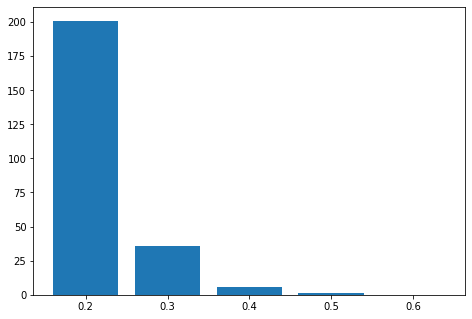

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0.2', '0.3', '0.4', '0.5', '0.6']
ax.bar(langs,length[1:6])
plt.show()